<a href="https://colab.research.google.com/github/ZhechengLiao/ML-algorithm/blob/master/ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [165]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

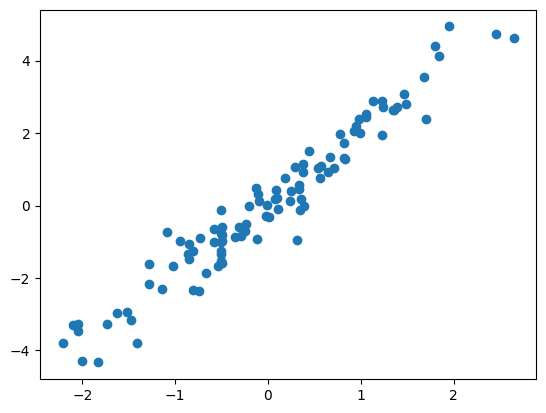

In [181]:
x_values = [i for i in np.random.randn(100)]
x_train = torch.tensor(x_values, dtype=torch.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 0.5*np.random.randn() for i in x_values]
y_train = torch.tensor(y_values, dtype=torch.float32)
y_train = y_train.reshape(-1, 1)

plt.scatter(x_train, y_train)

In [182]:
class LinearRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.Linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    output = self.Linear(x)
    return output

In [183]:
model = LinearRegression(1, 1)

loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [184]:
num_epochs = 10
for epoch in range(num_epochs):
  optimizer.zero_grad()
  out = model(x_train)
  l = loss(out, y_train)
  l.backward()
  optimizer.step()
  print(f'epoch:{epoch}, loss:{l}')

epoch:0, loss:1.3548682928085327
epoch:1, loss:0.9190996289253235
epoch:2, loss:0.655824601650238
epoch:3, loss:0.49676254391670227
epoch:4, loss:0.4006616473197937
epoch:5, loss:0.3425997793674469
epoch:6, loss:0.307519793510437
epoch:7, loss:0.2863248586654663
epoch:8, loss:0.2735190689563751
epoch:9, loss:0.2657817602157593


# Binary Classfication

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# Get Dataset, split train and test
iris = datasets.load_iris()

X = torch.tensor(iris.data[:-50, :2], dtype=torch.float32)
y = torch.tensor(iris.target[:-50], dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from torch import nn

# Define hypothesis
class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)
  def forward(self, x):
    outputs = torch.sigmoid(self.linear(x))
    return outputs

model = LogisticRegression(2, 1)

# Define loss and optimizer
loss = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Train
num_epochs = 10

for epoch in range(num_epochs):
  optimizer.zero_grad()
  output = model(X_train)
  l = loss(torch.squeeze(output), y_train)
  l.backward()
  optimizer.step()

  print(f'epoch: {epoch+1}, loss: {l}')


epoch: 1, loss: 0.297562837600708
epoch: 2, loss: 0.2963264584541321
epoch: 3, loss: 0.2951018512248993
epoch: 4, loss: 0.2938889265060425
epoch: 5, loss: 0.2926875054836273
epoch: 6, loss: 0.2914974093437195
epoch: 7, loss: 0.2903185188770294
epoch: 8, loss: 0.289150595664978
epoch: 9, loss: 0.28799352049827576
epoch: 10, loss: 0.28684723377227783
